## Lead Scoring Case Study
**Overview**<br>
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
<br><br>
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
<br><br>

<b> Problem Statement <br>
 The company requires a model which we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. </b>
 <br> <br>

<b> Goal of the Case Study </b> <br>
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Step 1: Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy & other Libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the datasets
leads_cs = pd.read_csv("Leads.csv")
leads_cs.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# basics of the df
leads_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Shape of the DF
leads_cs.shape

(9240, 37)

In [6]:
# Description of the Dataset
leads_cs.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 2: Clean the data - All Pre-Processing Steps

In [7]:
# Step1 Replace all Select fileds with null values

leads_cs = leads_cs.replace('Select', np.nan)
leads_cs.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
# missing values
round(100*(leads_cs.isnull().sum())/len(leads_cs), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Step2 Variables having percentage greater than 40 
Var_greater40 = round(100*(leads_cs.isnull().sum())/len(leads_cs), 2)>40
Var_greater40 

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                   False
How did you hear about X Education                True
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Magazine                                         False
Newspaper 

In [10]:
Var_greater40.value_counts()

False    30
True      7
dtype: int64

In [11]:
# 7 columns have null percentage greater than 40 i.e 

# Asymmetrique Activity Index
# Asymmetrique Profile Index
# Asymmetrique Activity Score
# Asymmetrique Profile Score
# Lead Profile
# Lead Quality
# How did you hear about X Education

In [12]:
# Step3 Drop those 7 unecessary columns as it has high % missing values

leads_cs.drop(columns=["Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score","Lead Profile","Lead Quality","How did you hear about X Education"],inplace=True)

In [13]:
# Also Drop "City" has even it has greater % of missing values i.e 40% (approx)

leads_cs = leads_cs.drop(['City'],axis=1)

In [14]:
# Inspecting DF
leads_cs.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


In [15]:
leads_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [16]:
leads_cs.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [17]:
# Step4 To check the unique categories for the categorical columns we will do value_counts

print(leads_cs['Lead Origin'].value_counts(),"\n")
print(leads_cs['Lead Source'].value_counts(),"\n")
print(leads_cs['Last Activity'].value_counts(),"\n")
print(leads_cs['Do Not Email'].value_counts(),"\n")
print(leads_cs['Do Not Call'].value_counts(),"\n")
print(leads_cs['Country'].value_counts(),"\n")
print(leads_cs['Specialization'].value_counts(),"\n")
print(leads_cs['X Education Forums'].value_counts(),"\n")
print(leads_cs['Digital Advertisement'].value_counts(),"\n")
print(leads_cs['Newspaper'].value_counts(),"\n")
print(leads_cs['Receive More Updates About Our Courses'].value_counts(),"\n")
print(leads_cs['Through Recommendations'].value_counts(),"\n")
print(leads_cs['Tags'].value_counts(),"\n")
print(leads_cs['Update me on Supply Chain Content'].value_counts(),"\n")
print(leads_cs['Get updates on DM Content'].value_counts(),"\n")
print(leads_cs['City'].value_counts(),"\n")
print(leads_cs['I agree to pay the amount through cheque'].value_counts(),"\n")
print(leads_cs['A free copy of Mastering The Interview'].value_counts(),"\n")
print(leads_cs['Last Notable Activity'].value_counts(),"\n")
print(leads_cs['What is your current occupation'].value_counts(),"\n")
print(leads_cs['What matters most to you in choosing a course'].value_counts(),"\n")
print(leads_cs['Search'].value_counts(),"\n")
print(leads_cs['Magazine'].value_counts(),"\n")
print(leads_cs['Newspaper Article'].value_counts(),"\n")


Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
WeLearn                 1
blog                    1
Pay per Click Ads       1
testone                 1
NC_EDM                  1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64 

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Emai

KeyError: 'City'

In [18]:
# Checking if there are columns with one unique value since it won't affect our analysis
leads_cs.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [19]:
# From the above Analysis we can infer that Country has the highest inconsistency between the variabes
# Which is highly skewed so its better to drop 'Country' column from the dataset and
# The Unique categories variables such as ['Magazine','Receive More Updates About Our Courses',
#'I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content"] can be dropped.

leads_cs = leads_cs.drop(['Country'],axis=1)
leads_cs = leads_cs.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [20]:
# Inspecting DF
leads_cs.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [21]:
# Its AlphaNumeric Data and not necessary for further analysis
leads_cs.drop('Prospect ID', axis=1, inplace=True)

In [22]:
leads_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [23]:
# Step5 Identifying categorical Columns who has many categories but with less % of rows we can aggregate them as "other"

In [24]:
# Value Counts of the remaining all categorical Columns

print(leads_cs['Lead Origin'].value_counts(),"\n")
print(leads_cs['Lead Source'].value_counts(),"\n")
print(leads_cs['Last Activity'].value_counts(),"\n")
print(leads_cs['Do Not Email'].value_counts(),"\n")
print(leads_cs['Do Not Call'].value_counts(),"\n")
print(leads_cs['Specialization'].value_counts(),"\n")
print(leads_cs['X Education Forums'].value_counts(),"\n")
print(leads_cs['Digital Advertisement'].value_counts(),"\n")
print(leads_cs['Newspaper'].value_counts(),"\n")
print(leads_cs['Through Recommendations'].value_counts(),"\n")
print(leads_cs['Tags'].value_counts(),"\n")
print(leads_cs['A free copy of Mastering The Interview'].value_counts(),"\n")
print(leads_cs['Last Notable Activity'].value_counts(),"\n")
print(leads_cs['What is your current occupation'].value_counts(),"\n")
print(leads_cs['What matters most to you in choosing a course'].value_counts(),"\n")
print(leads_cs['Search'].value_counts(),"\n")
print(leads_cs['Newspaper Article'].value_counts(),"\n")

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
WeLearn                 1
blog                    1
Pay per Click Ads       1
testone                 1
NC_EDM                  1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64 

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Emai

In [25]:
# From above Analysis :
# These Columns values has to be marked as other :
# Lead Source
# Last Activity
# Tags (Dont use this in model)
# Last Notable Activity

In [26]:
# Assign value as 'other' to those 4 columns
leads_cs.loc[leads_cs['Lead Source'].isin((leads_cs['Lead Source'].value_counts()[leads_cs['Lead Source'].value_counts() < 50]).index), 'Lead Source'] = 'Other'
leads_cs.loc[leads_cs['Last Activity'].isin((leads_cs['Last Activity'].value_counts()[leads_cs['Last Activity'].value_counts() < 50]).index), 'Last Activity'] = 'Other'
leads_cs.loc[leads_cs['Tags'].isin((leads_cs['Tags'].value_counts()[leads_cs['Tags'].value_counts() < 50]).index), 'Tags'] = 'Other'
leads_cs.loc[leads_cs['Last Notable Activity'].isin((leads_cs['Last Notable Activity'].value_counts()[leads_cs['Last Notable Activity'].value_counts() < 50]).index), 'Last Notable Activity'] = 'Other'


In [27]:
# Inspect the DF
leads_cs.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [28]:
# Now % of missing values
round(100*(leads_cs.isnull().sum())/len(leads_cs), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

There is a huge value of null variables in 4 columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then

In [29]:
# # Step6 Imputing columns with less % of missing values

leads_cs['Specialization'] = leads_cs['Specialization'].fillna('not provided') 
leads_cs['What is your current occupation'] = leads_cs['What is your current occupation'].fillna('not provided')
leads_cs['What matters most to you in choosing a course'] = leads_cs['What matters most to you in choosing a course'].fillna('not provided')
leads_cs['Tags'] = leads_cs['Tags'].fillna('not provided')

leads_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [30]:
# Now % of missing values
round(100*(leads_cs.isnull().sum())/len(leads_cs), 2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [31]:
leads_cs.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [32]:
# Impute Numeric columns with their mean value 

leads_cs['TotalVisits'].fillna(value=round(leads_cs['TotalVisits'].mean(),1), inplace=True)
leads_cs['Page Views Per Visit'].fillna(value=round(leads_cs['Page Views Per Visit'].mean(),1), inplace=True)

In [33]:
# Now Recheck % of missing values
round(100*(leads_cs.isnull().sum())/len(leads_cs), 2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    1.11
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [34]:
# Impute 1 last categorical column i.e. 'Last Activity' with their mode value 

leads_cs['Last Activity'].fillna(leads_cs['Last Activity'].mode()[0], inplace = True)

In [35]:
# Now Recheck % of missing values
round(100*(leads_cs.isnull().sum())/len(leads_cs), 2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [36]:
# The only variable "Lead Source" which is not even 0.5 can be ignored and move further analysis

In [37]:
# Step7 Check the % of rows that are reatined.
round((len(leads_cs)/9240)*100 , 2)


100.0

In [38]:
leads_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9240 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9240 non-null   float64
 9   Last Activity                                  9240 

In [39]:
# Inspect DF
leads_cs.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [40]:
#Now Shape of DF
leads_cs.shape

(9240, 22)

In [41]:
# Further Steps

# Data Preparation
# Modelling.

# RFE (20-25  Var)
# + Manual Approach
# Good Sensitivity i.e 80+
# Generate Score var
# predict probability function
# Confsuion Matrix
# No missing Vlues in Modelling
# Outlier Treatment
# Final model 10-15 var
# Correlations - Drop high correalted variables
# ROC curve

# Step 3: EDA

### 3.1. Univariate Analysis

##### Categorical Variables


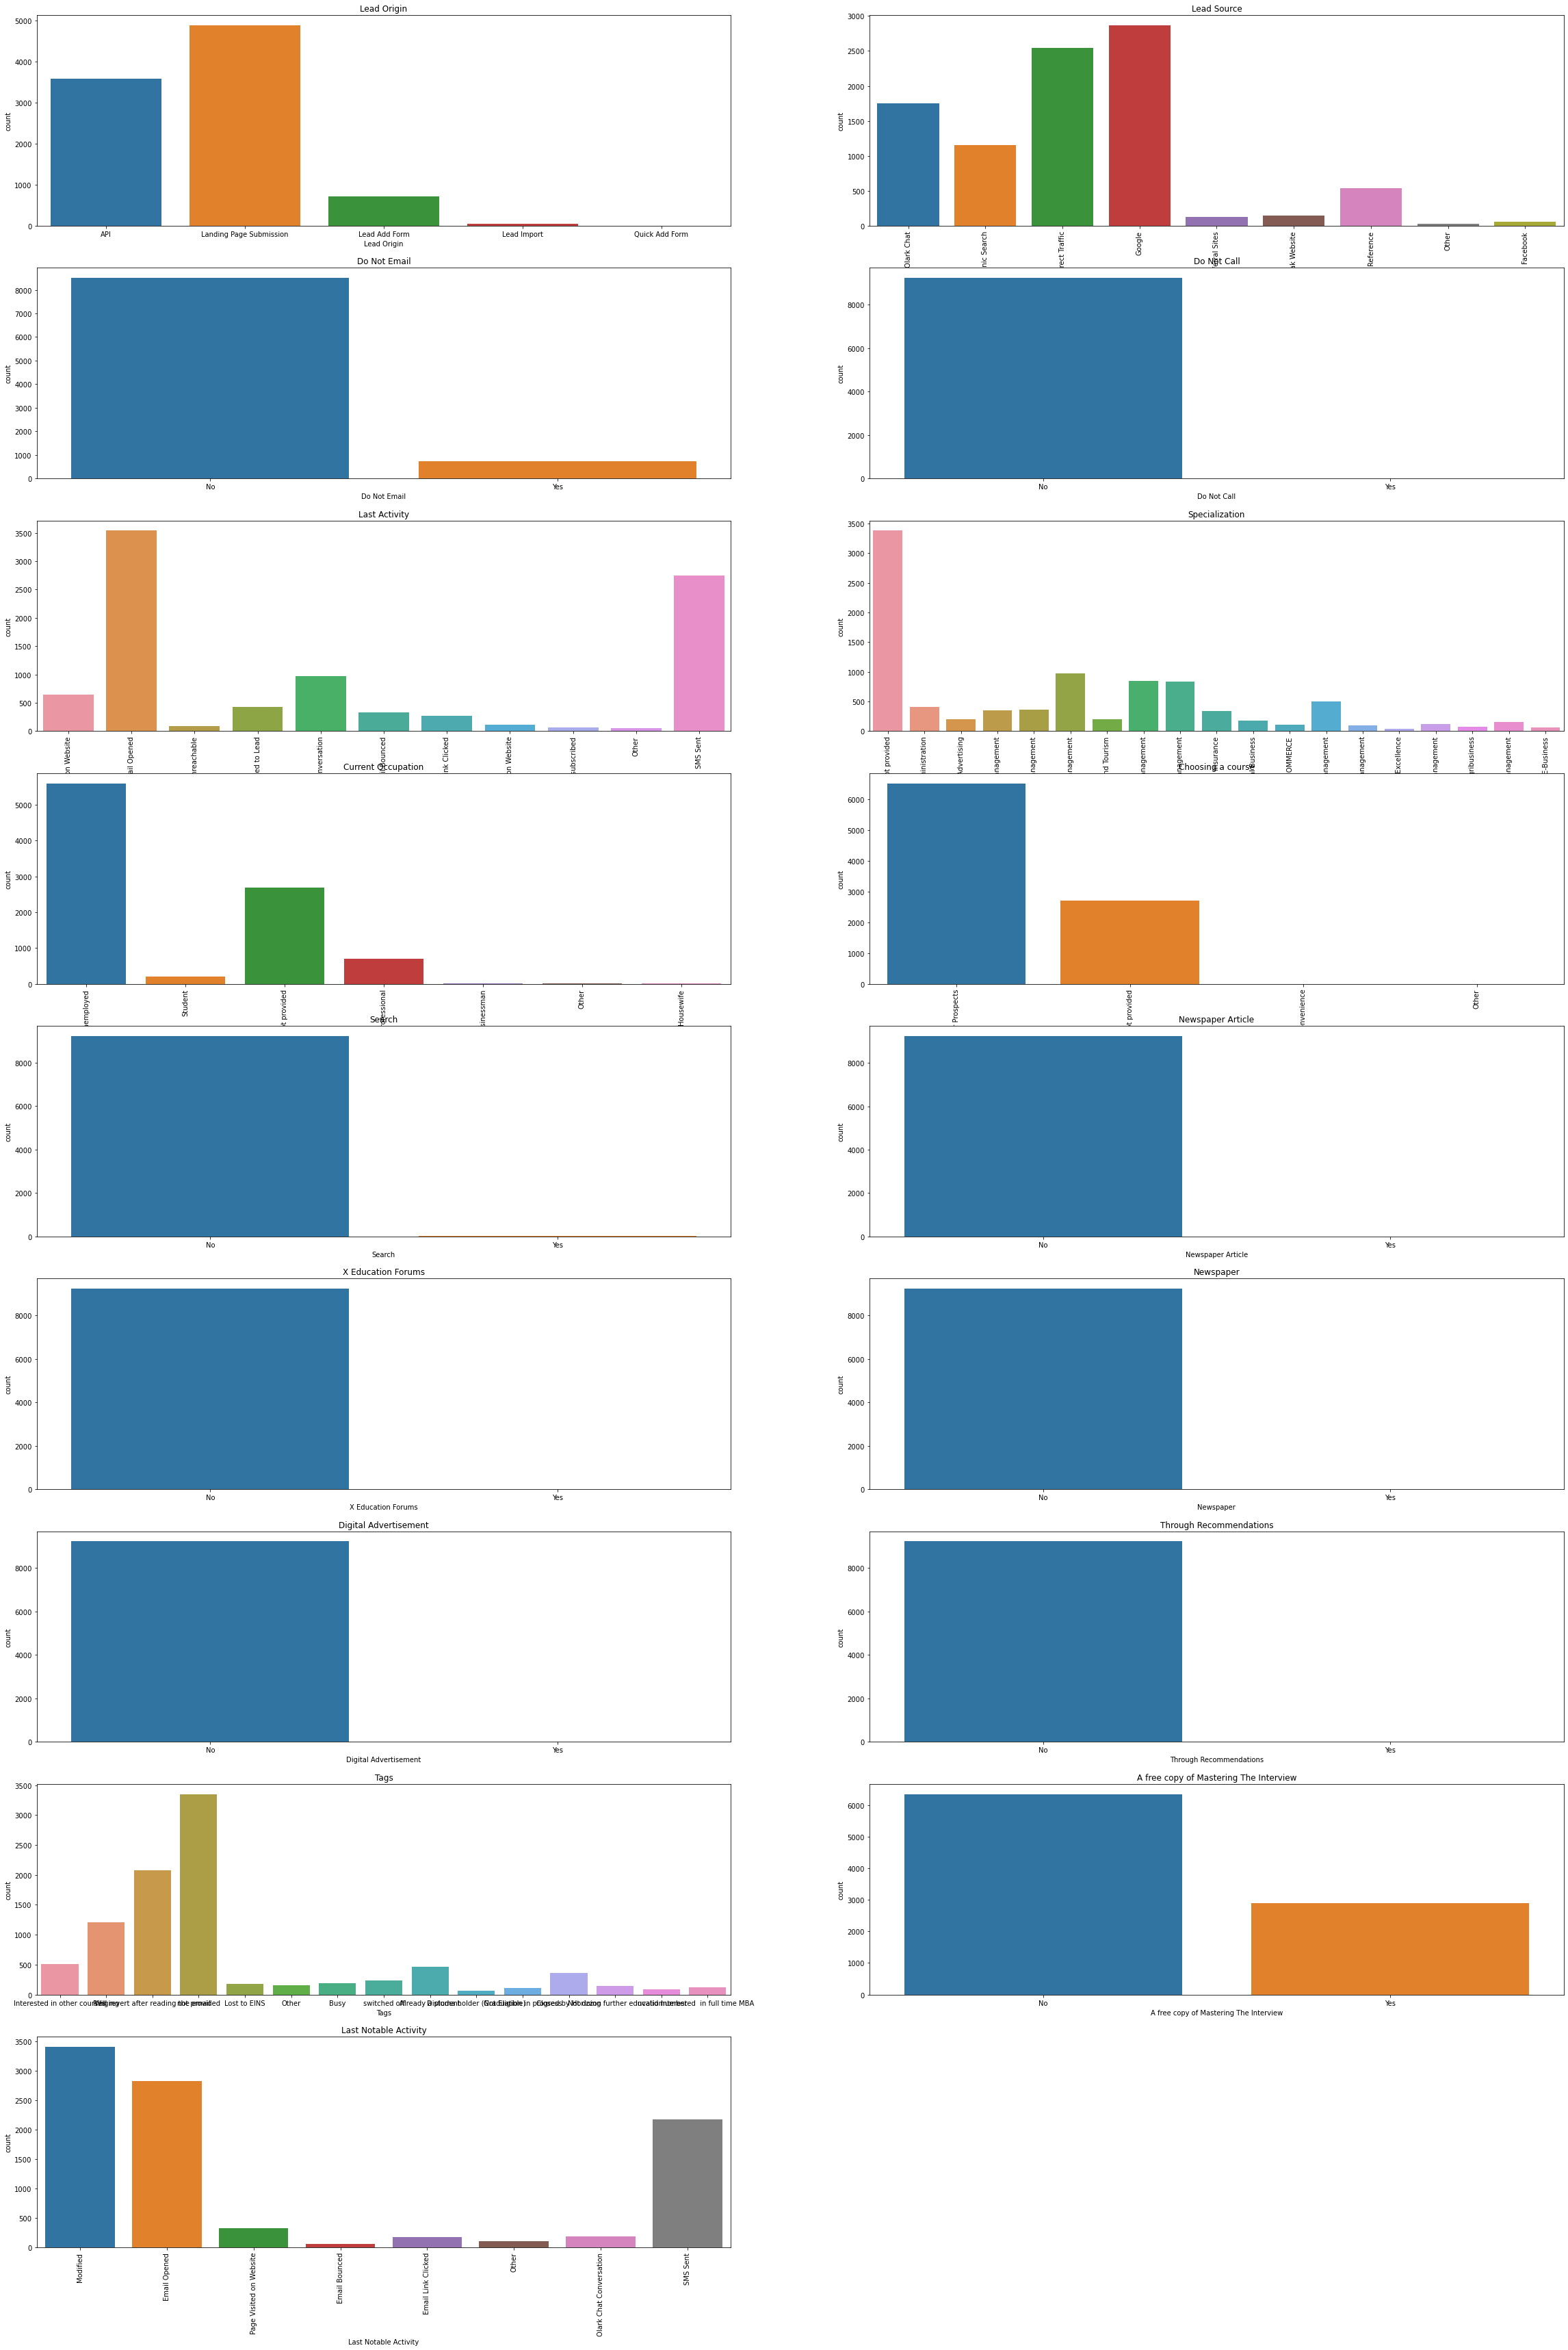

In [42]:
plt.figure(figsize = (40,60))

plt.subplot(9,2,1)
sns.countplot(leads_cs['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(9,2,2)
sns.countplot(leads_cs['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(9,2,3)
sns.countplot(leads_cs['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(9,2,4)
sns.countplot(leads_cs['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(9,2,5)
sns.countplot(leads_cs['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(9,2,6)
sns.countplot(leads_cs['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(9,2,7)
sns.countplot(leads_cs['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')

plt.subplot(9,2,8)
sns.countplot(leads_cs['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('Choosing a course')

plt.subplot(9,2,9)
sns.countplot(leads_cs['Search'])
plt.title('Search')

plt.subplot(9,2,10)
sns.countplot(leads_cs['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(9,2,11)
sns.countplot(leads_cs['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(9,2,12)
sns.countplot(leads_cs['Newspaper'])
plt.title('Newspaper')

plt.subplot(9,2,13)
sns.countplot(leads_cs['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(9,2,14)
sns.countplot(leads_cs['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(9,2,15)
sns.countplot(leads_cs['Tags'])
plt.title('Tags')

plt.subplot(9,2,16)
sns.countplot(leads_cs['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(9,2,17)
sns.countplot(leads_cs['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

## Visualizing single/individual variables.

- To Understand the each variable frequencies we use countplot
- Example for What is your current occupation: 

-We observed that the frequency of working professional is less in comparison to others so they have to be increased and transform as leads Likewise, visualized for all the variables and understood the variables individually.

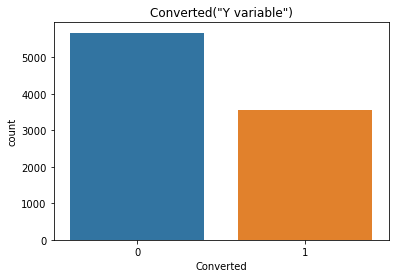

In [43]:
# Target Variable

sns.countplot(leads_cs['Converted'])
plt.title('Converted("Y variable")')
plt.show()

In [44]:
leads_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9240 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9240 non-null   float64
 9   Last Activity                                  9240 

#### Numerical Variables

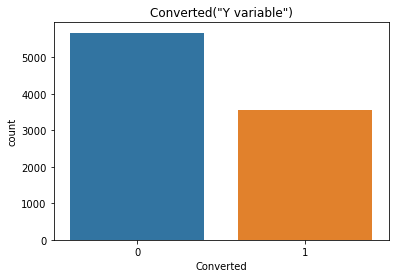

In [45]:
# Target Variable

sns.countplot(leads_cs['Converted'])
plt.title('Converted("Y variable")')
plt.show()

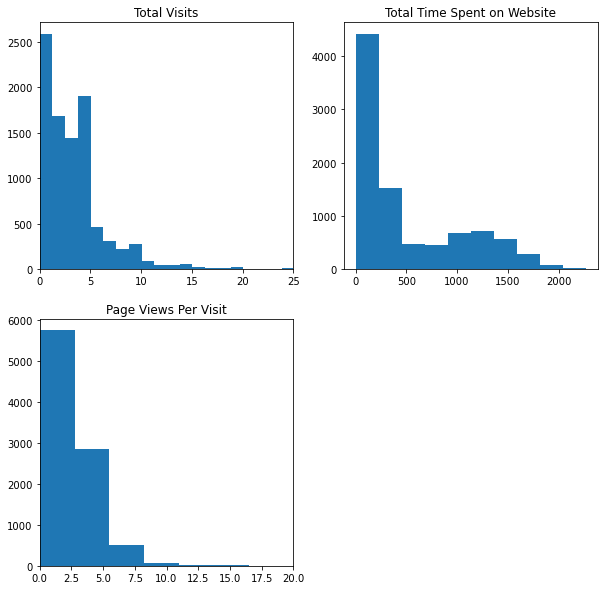

In [46]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(leads_cs['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(leads_cs['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(leads_cs['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### 3.2. Bivariate Analysis

##### Categorical Variables

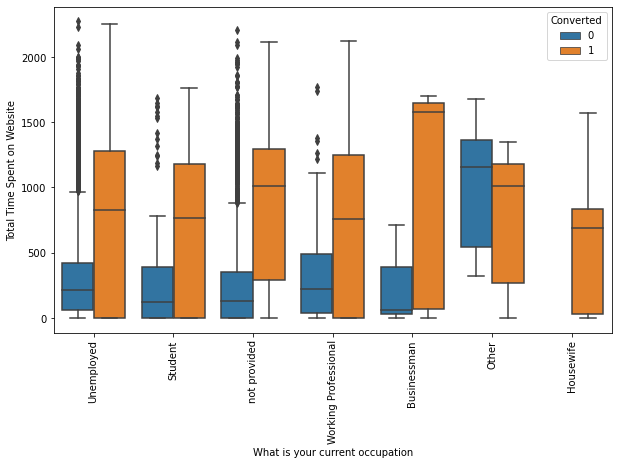

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot('What is your current occupation','Total Time Spent on Website', hue='Converted', data=leads_cs)
plt.xticks(rotation=90)
plt.show()

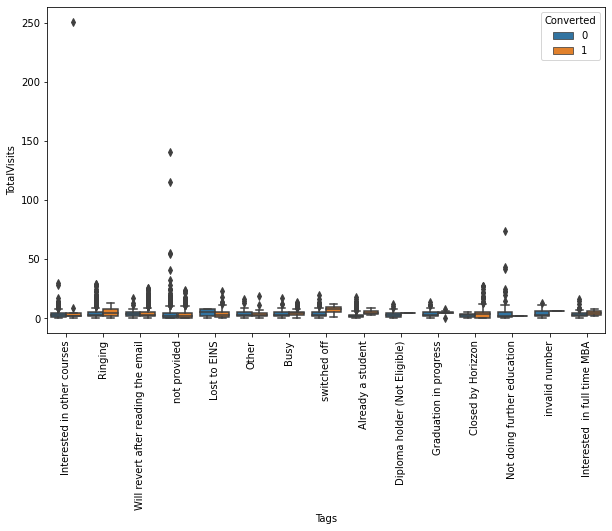

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot('Tags','TotalVisits',hue='Converted', data=leads_cs)
plt.xticks(rotation=90)
plt.show()

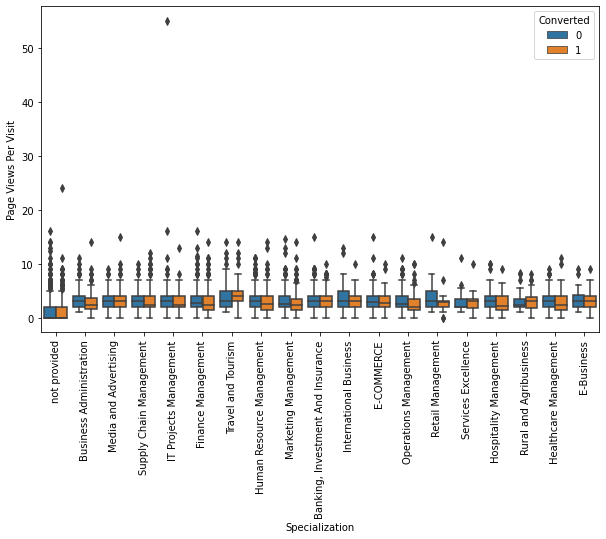

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot('Specialization','Page Views Per Visit',hue='Converted', data=leads_cs)
plt.xticks(rotation=90)
plt.show()

### Visualizing multiple variables.
- In bivariate analysis we Understand the each variable relation with other variable.
- Example for 'What is your current occupation’ v.s ‘Total Time Spent on Website'

- We observed that the variable working professional spend decent time on website but their conversion ratio is less. Likewise, we visualized for all the variables understood the variable relations.

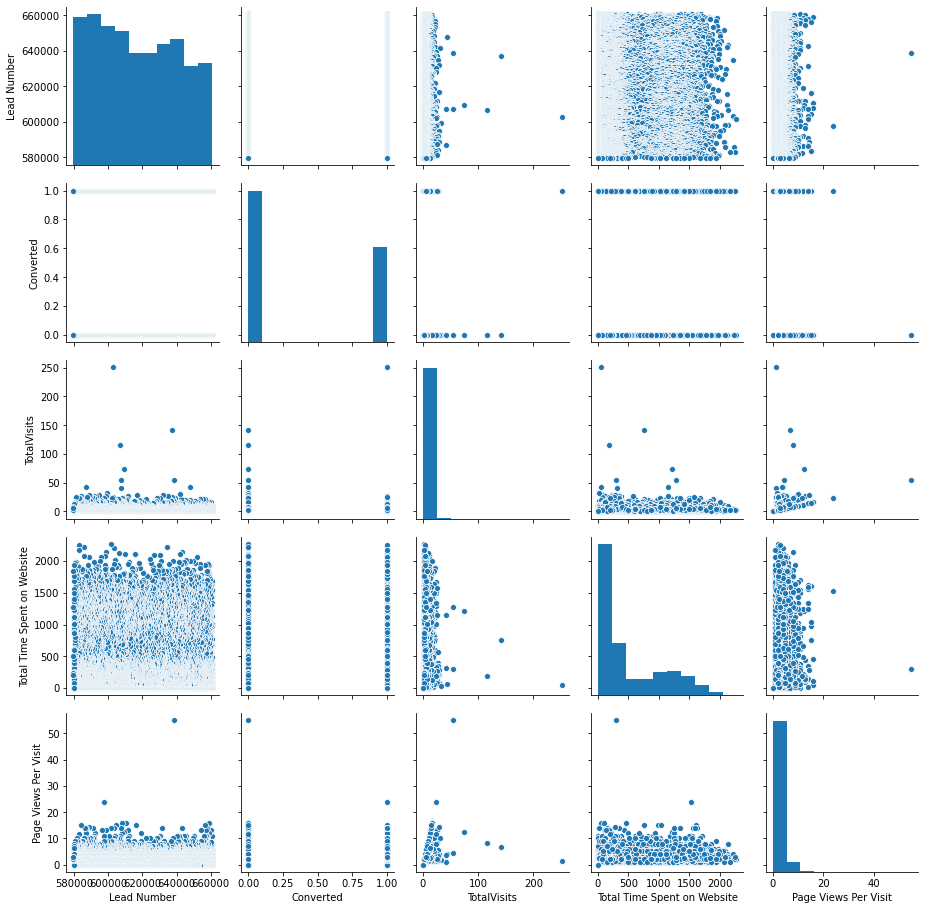

In [50]:
# Visulaization of numeric varibales using pairplot

sns.pairplot(leads_cs)
plt.show()

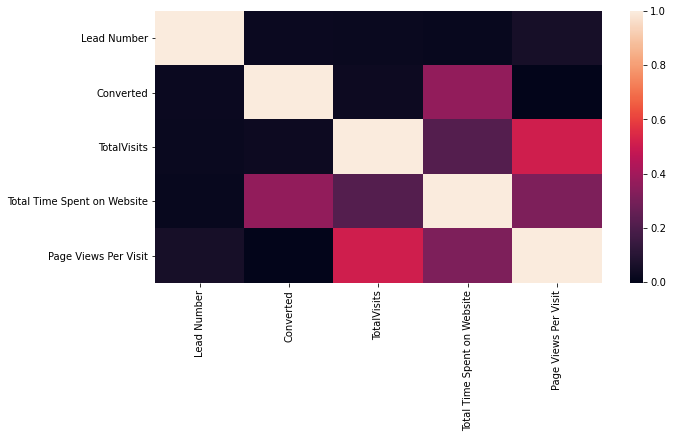

In [51]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(leads_cs.corr())
plt.show()

In [52]:
# From Above : Lead Number is highly corelated with Converted so better drop it.
# Drop Lead Number
leads_cs.drop('Lead Number', axis=1, inplace=True)

It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.

In [53]:
numeric = leads_cs[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.444567,487.698268,2.363371
std,4.818726,548.021466,2.145337
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


There aren't any major outliers, so moving on to analysis

## Step 4: Dummy Variables

In [54]:
leads_cs.head(5)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,not provided,...,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,not provided,...,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,not provided,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [55]:
# Inspect DF
leads_cs.head(5)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,not provided,...,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,not provided,...,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,not provided,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [56]:
# To get only categorical/object variables
leads_cs.loc[:, leads_cs.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [57]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(leads_cs[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# # Add the results to the master dataframe
# lead_final_dum = pd.concat([leads_cs, dummy], axis=1)
# lead_final_dum

In [58]:
# Add the results to the master dataframe
lead_final = pd.concat([leads_cs, dummy], axis=1)
lead_final.head(5)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,not provided,...,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,not provided,...,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,1,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,not provided,...,0,0,0,0,0,1,0,0,0,0


In [59]:
lead_final = lead_final.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Specialization', 
'What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums',
'Newspaper','Digital Advertisement', 'Through Recommendations', 'Tags','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
lead_final.head(5)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [60]:
lead_final.shape

(9240, 69)

In [61]:
lead_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 69 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Converted                                                                9240 non-null   int64  
 1   TotalVisits                                                              9240 non-null   float64
 2   Total Time Spent on Website                                              9240 non-null   int64  
 3   Page Views Per Visit                                                     9240 non-null   float64
 4   Lead Origin_Landing Page Submission                                      9240 non-null   uint8  
 5   Lead Origin_Lead Add Form                                                9240 non-null   uint8  
 6   Lead Origin_Lead Import                                                 

## Step 5: Test-Train Split

In [62]:
# Import the required library
from sklearn.model_selection import train_test_split

In [63]:
# Putting feature variable to X
X = lead_final.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [64]:
# Putting response variable to y
y = lead_final['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [65]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [66]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1871,0.0,0,0.00,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6795,4.0,487,1.33,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3516,5.0,106,2.50,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8105,5.0,1230,5.00,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3934,0.0,0,0.00,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [67]:
X_train.shape

(6468, 68)

## Step 6: Feature Scaling

In [68]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1871,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6795,0.015936,0.214349,0.024182,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3516,0.019920,0.046655,0.045455,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8105,0.019920,0.541373,0.090909,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3934,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


## Step 7: Looking at Correlations

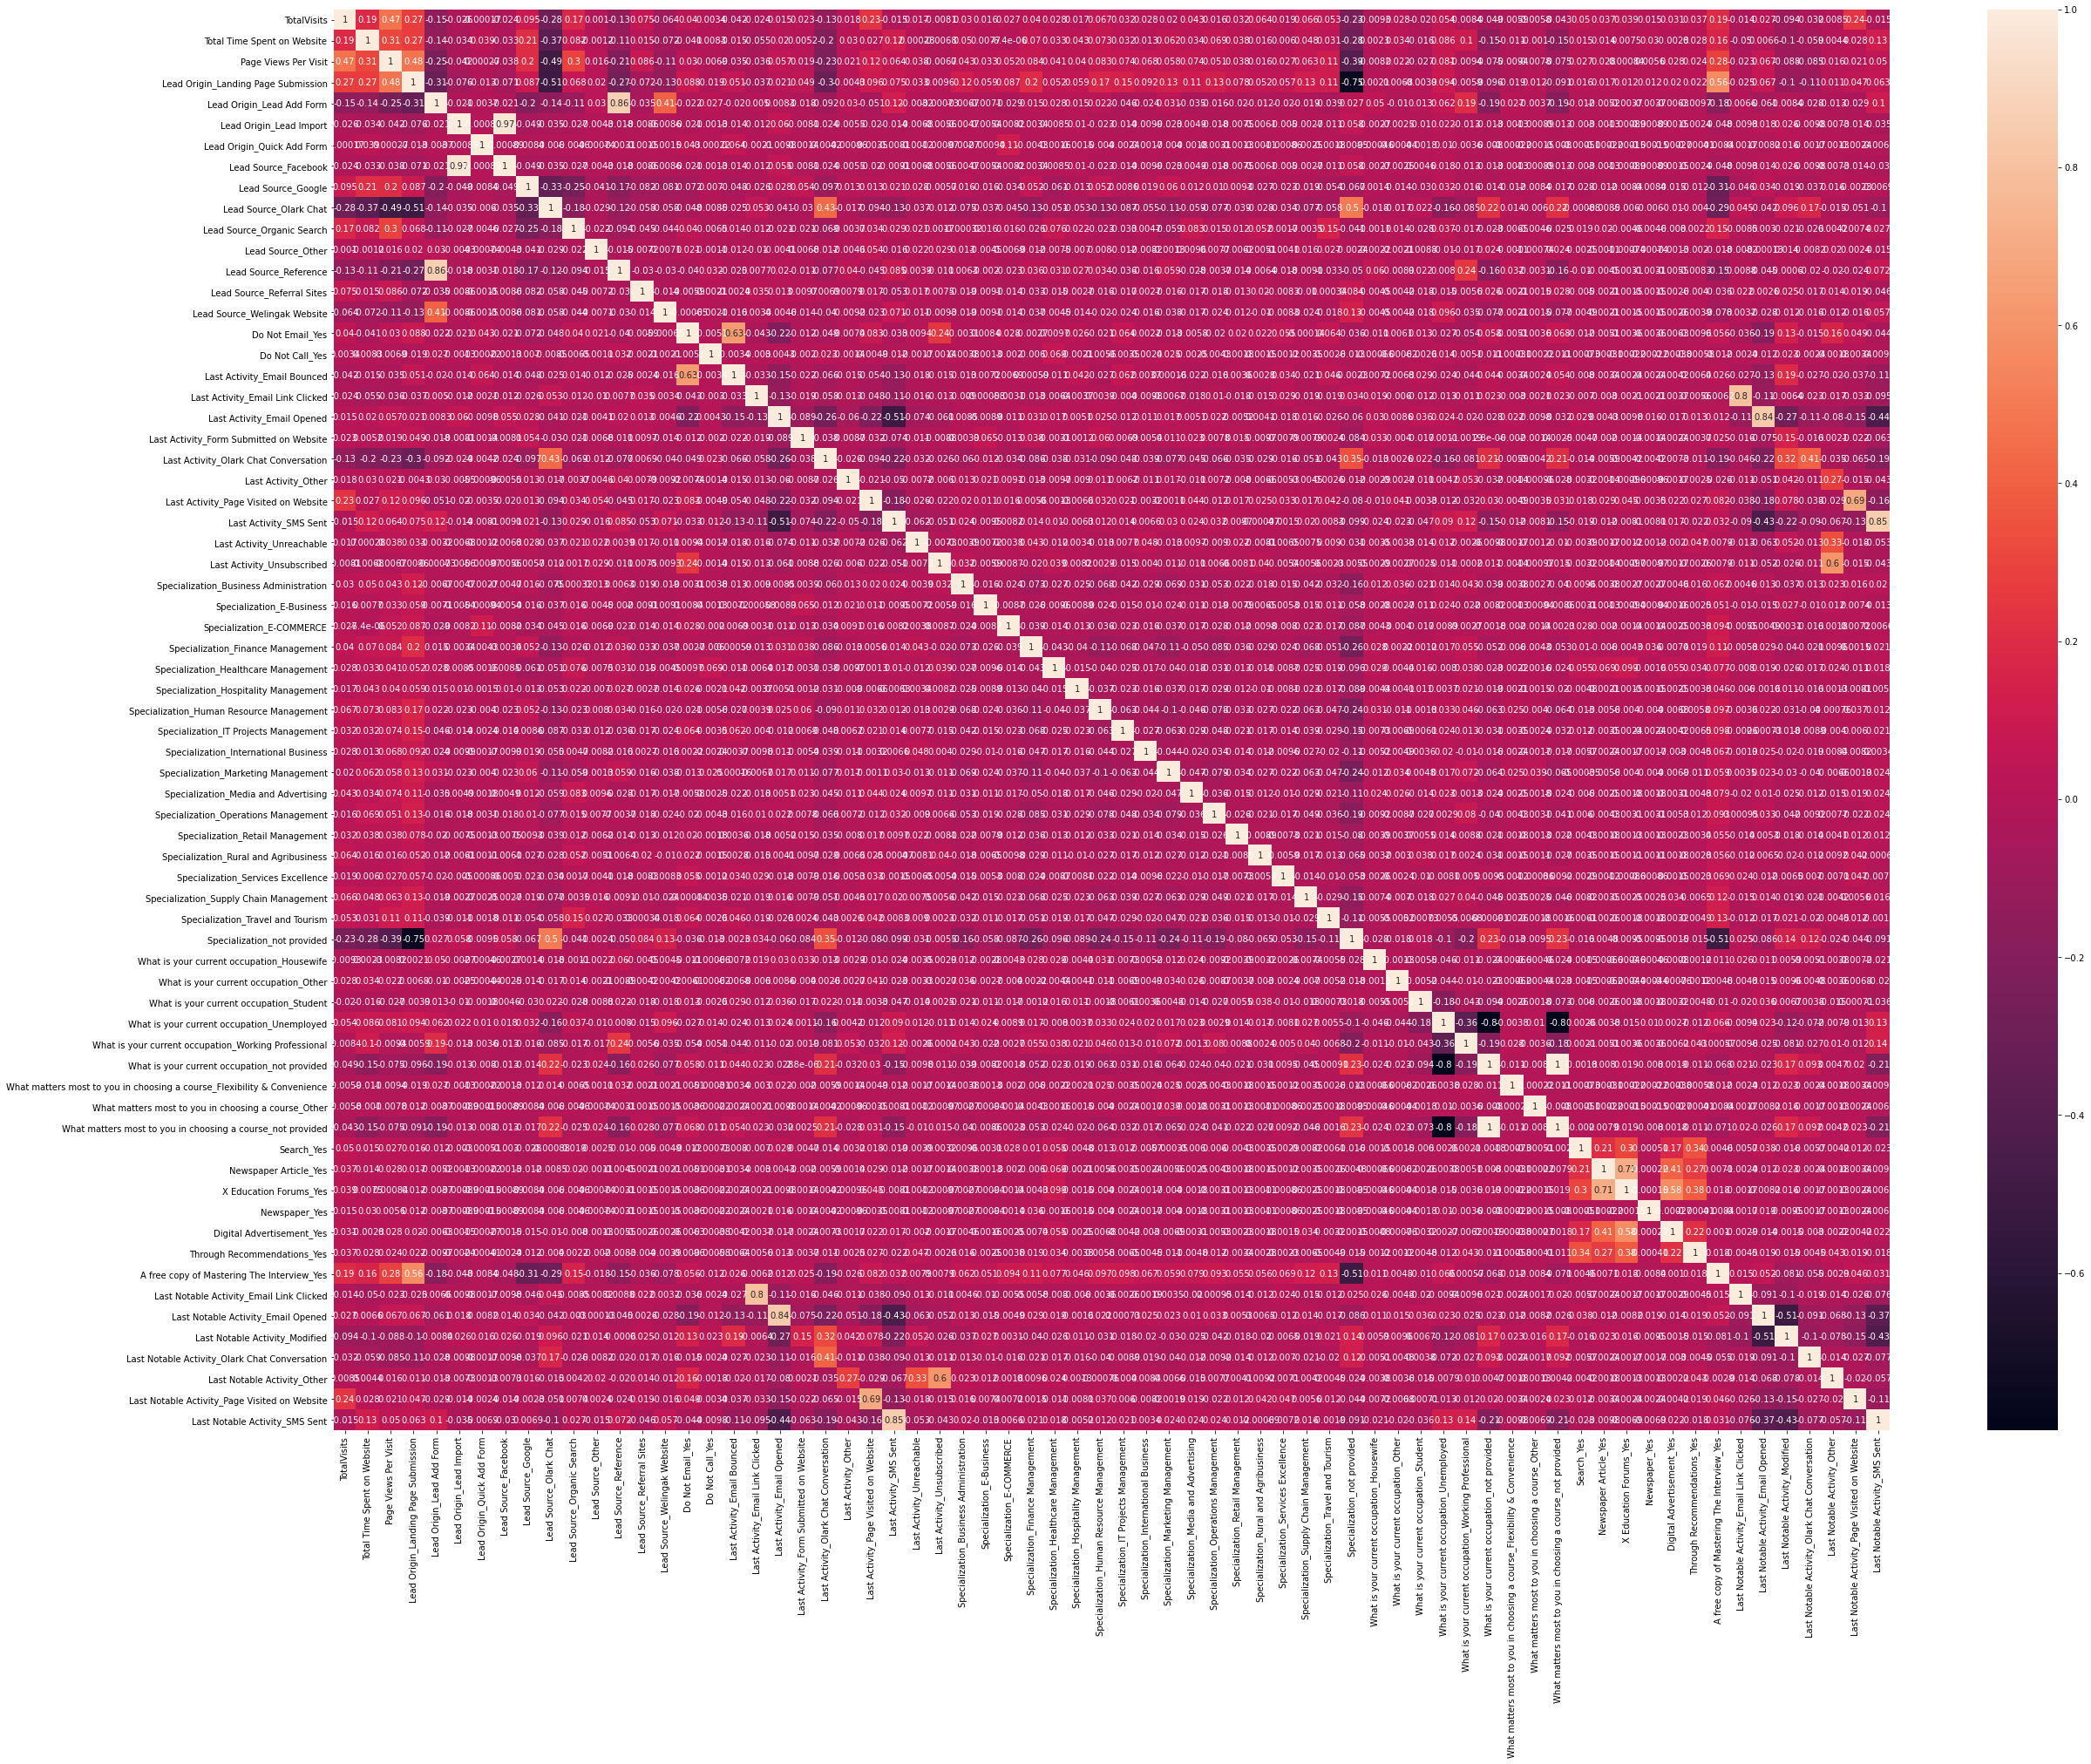

In [69]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,30))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [70]:
corr = X_train.corr()
corr.unstack().reset_index()

,level_0,level_1,0
0,TotalVisits,TotalVisits,1.000000
1,TotalVisits,Total Time Spent on Website,0.188302
2,TotalVisits,Page Views Per Visit,0.472554
3,TotalVisits,Lead Origin_Landing Page Submission,0.270550
4,TotalVisits,Lead Origin_Lead Add Form,-0.151539
...,...,...,...
4619,Last Notable Activity_SMS Sent,Last Notable Activity_Modified,-0.425670
4620,Last Notable Activity_SMS Sent,Last Notable Activity_Olark Chat Conversation,-0.076728
4621,Last Notable Activity_SMS Sent,Last Notable Activity_Other,-0.057095
4622,Last Notable Activity_SMS Sent,Last Notable Activity_Page Visited on Website,-0.107640


In [71]:
corr = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))

In [72]:
corr = corr.unstack().reset_index()
corr.columns = ['var1','var2','correlation']
# corr['correlation'] = corr['correlation'].abs

In [73]:
corr.sort_values(by= 'correlation' , ascending=False).head()

,var1,var2,correlation
3654,What matters most to you in choosing a course_...,What is your current occupation_not provided,0.995167
481,Lead Source_Facebook,Lead Origin_Lead Import,0.969542
820,Lead Source_Reference,Lead Origin_Lead Add Form,0.862134
4580,Last Notable Activity_SMS Sent,Last Activity_SMS Sent,0.851642
4235,Last Notable Activity_Email Opened,Last Activity_Email Opened,0.844612


### Step 8: Model Building

#### Running Your First Training Model

## RFE

In [74]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [75]:
# Import RFE
from sklearn.feature_selection import RFE

In [76]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1871,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6795,0.015936,0.214349,0.024182,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3516,0.019920,0.046655,0.045455,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8105,0.019920,0.541373,0.090909,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3934,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [77]:
# Running RFE with 20 variables as output
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

In [78]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 41),
 ('Lead Origin_Quick Add Form', False, 29),
 ('Lead Source_Facebook', False, 12),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 38),
 ('Lead Source_Other', False, 21),
 ('Lead Source_Reference', False, 17),
 ('Lead Source_Referral Sites', False, 39),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Do Not Call_Yes', False, 10),
 ('Last Activity_Email Bounced', False, 37),
 ('Last Activity_Email Link Clicked', False, 22),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 24),
 ('Last Activity_Olark Chat Conversation', False, 15),
 ('Last Activity_Other', True, 1),
 ('Last Activity_Page Visited on Website', False, 

In [79]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

All the variables selected by RFE, next statistics part (p-values and the VIFs)

In [80]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [81]:
# Importing statsmodels
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2550.6
Date:                Mon, 07 Sep 2020   Deviance:                       5101.1
Time:                        17:57:26   Pearson chi2:                 7.26e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -1.4380      0.179     -8.053      0.000      -1.788      -1.088
TotalVisits                                                    9.1341      2.308      3.957      0.000       4.610      13.658
Total Time Spent on Website                                    4.5068      0.169     26.679      0.000       4.176       4.838
Page Views Per Visit                                          -3.7077      1.334     -2.780      0.005      -6.321      -1.094
Lead Origin_Landing Page Submission                           -1.0195      0.131     -7.782      0.000      -1.276      -0.763
Lead Origin_Lead Add Form                                      2.8647      0.211     13.559      0.000       2.451       3.279
Lead Source_Olark Chat                                         1.0057      0.133      7.539      0.000       0.744       1.267
Lead Source_Welingak Website                                   2.4018      0.748      3.212      0.001       0.936       3.867
Do Not Email_Yes                                              -1.1917      0.182     -6.565      0.000      -1.547      -0.836
Last Activity_Email Opened                                     0.5642      0.112      5.027      0.000       0.344       0.784
Last Activity_Other                                            1.8372      0.522      3.522      0.000       0.815       2.859
Last Activity_SMS Sent                                         1.7421      0.114     15.292      0.000       1.519       1.965
Specialization_Hospitality Management                         -0.9763      0.333     -2.928      0.003      -1.630      -0.323
Specialization_not provided                                   -0.9706      0.126     -7.700      0.000      -1.218      -0.724
What is your current occupation_Housewife                     22.8971   1.35e+04      0.002      0.999   -2.64e+04    2.64e+04
What is your current occupation_Working Professional           2.4544      0.194     12.658      0.000       2.074       2.835
What matters most to you in choosing a course_not provided    -1.0258      0.089    -11.557      0.000      -1.200      -0.852
Newspaper_Yes                                                -24.4065   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Last Notable Activity_Modified                                -0.6995      0.091     -7.657      0.000      -0.879      -0.520
Last Notable Activity_Olark Chat Conversation                 -0.6221      0.357     -1.744      0.081      -1.321       0.077
Last Notable Activity_Other                                    1.6838      0.358      4.704      0.000       0.982       2.385
===================================

In [82]:
# Drop Newspaper_Yes bcoz of high p-value
X_train.drop('Newspaper_Yes', axis = 1, inplace = True)

In [83]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,4.22
2,Page Views Per Visit,3.79
12,Specialization_not provided,3.05
8,Last Activity_Email Opened,2.71
10,Last Activity_SMS Sent,2.45
1,Total Time Spent on Website,2.13
5,Lead Source_Olark Chat,2.06
16,Last Notable Activity_Modified,2.05
0,TotalVisits,1.86
4,Lead Origin_Lead Add Form,1.70


In [85]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2552.5
Date:                Mon, 07 Sep 2020   Deviance:                       5105.1
Time:                        17:57:26   Pearson chi2:                 7.26e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -1.4332      0.178     -8.030      0.000      -1.783      -1.083
TotalVisits                                                    9.0414      2.303      3.926      0.000       4.528      13.555
Total Time Spent on Website                                    4.4948      0.169     26.644      0.000       4.164       4.825
Page Views Per Visit                                          -3.6794      1.332     -2.761      0.006      -6.291      -1.068
Lead Origin_Landing Page Submission                           -1.0216      0.131     -7.802      0.000      -1.278      -0.765
Lead Origin_Lead Add Form                                      2.8616      0.211     13.548      0.000       2.448       3.276
Lead Source_Olark Chat                                         1.0021      0.133      7.517      0.000       0.741       1.263
Lead Source_Welingak Website                                   2.4017      0.748      3.212      0.001       0.936       3.867
Do Not Email_Yes                                              -1.1906      0.181     -6.562      0.000      -1.546      -0.835
Last Activity_Email Opened                                     0.5616      0.112      5.006      0.000       0.342       0.781
Last Activity_Other                                            1.8366      0.521      3.524      0.000       0.815       2.858
Last Activity_SMS Sent                                         1.7415      0.114     15.294      0.000       1.518       1.965
Specialization_Hospitality Management                         -0.9738      0.333     -2.922      0.003      -1.627      -0.321
Specialization_not provided                                   -0.9710      0.126     -7.706      0.000      -1.218      -0.724
What is your current occupation_Housewife                     22.8983   1.35e+04      0.002      0.999   -2.64e+04    2.64e+04
What is your current occupation_Working Professional           2.4554      0.194     12.666      0.000       2.075       2.835
What matters most to you in choosing a course_not provided    -1.0241      0.089    -11.543      0.000      -1.198      -0.850
Last Notable Activity_Modified                                -0.6987      0.091     -7.651      0.000      -0.878      -0.520
Last Notable Activity_Olark Chat Conversation                 -0.6216      0.356     -1.744      0.081      -1.320       0.077
Last Notable Activity_Other                                    1.6822      0.358      4.701      0.000       0.981       2.384
==============================================================================================================================
"""

In [86]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,4.22
2,Page Views Per Visit,3.79
12,Specialization_not provided,3.05
8,Last Activity_Email Opened,2.71
10,Last Activity_SMS Sent,2.45
1,Total Time Spent on Website,2.13
5,Lead Source_Olark Chat,2.06
16,Last Notable Activity_Modified,2.05
0,TotalVisits,1.86
4,Lead Origin_Lead Add Form,1.70


In [87]:
#The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation_Housewife'

In [88]:
# Drop What is your current occupation_Housewife - High P value
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [89]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2559.7
Date:                Mon, 07 Sep 2020   Deviance:                       5119.3
Time:                        17:57:28   Pearson chi2:                 7.27e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -1.4245      0.178     -7.996      0.000      -1.774      -1.075
TotalVisits                                                    8.9637      2.298      3.901      0.000       4.460      13.467
Total Time Spent on Website                                    4.4902      0.168     26.651      0.000       4.160       4.820
Page Views Per Visit                                          -3.7280      1.331     -2.800      0.005      -6.338      -1.118
Lead Origin_Landing Page Submission                           -1.0154      0.131     -7.762      0.000      -1.272      -0.759
Lead Origin_Lead Add Form                                      2.8741      0.211     13.626      0.000       2.461       3.287
Lead Source_Olark Chat                                         0.9980      0.133      7.492      0.000       0.737       1.259
Lead Source_Welingak Website                                   2.3852      0.748      3.190      0.001       0.920       3.851
Do Not Email_Yes                                              -1.1951      0.181     -6.589      0.000      -1.551      -0.840
Last Activity_Email Opened                                     0.5640      0.112      5.041      0.000       0.345       0.783
Last Activity_Other                                            1.8293      0.521      3.509      0.000       0.807       2.851
Last Activity_SMS Sent                                         1.7354      0.114     15.272      0.000       1.513       1.958
Specialization_Hospitality Management                         -0.9812      0.333     -2.945      0.003      -1.634      -0.328
Specialization_not provided                                   -0.9753      0.126     -7.746      0.000      -1.222      -0.729
What is your current occupation_Working Professional           2.4457      0.194     12.623      0.000       2.066       2.825
What matters most to you in choosing a course_not provided    -1.0288      0.089    -11.606      0.000      -1.203      -0.855
Last Notable Activity_Modified                                -0.6927      0.091     -7.604      0.000      -0.871      -0.514
Last Notable Activity_Olark Chat Conversation                 -0.6205      0.356     -1.741      0.082      -1.319       0.078
Last Notable Activity_Other                                    1.6806      0.358      4.698      0.000       0.979       2.382
==============================================================================================================================
"""

In [90]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,4.22
2,Page Views Per Visit,3.79
12,Specialization_not provided,3.05
8,Last Activity_Email Opened,2.70
10,Last Activity_SMS Sent,2.45
1,Total Time Spent on Website,2.13
5,Lead Source_Olark Chat,2.06
15,Last Notable Activity_Modified,2.05
0,TotalVisits,1.86
4,Lead Origin_Lead Add Form,1.70


In [91]:
X_train.drop('Last Notable Activity_Olark Chat Conversation', axis = 1, inplace = True)

#Drop "Last Notable Activity_Olark Chat Conversation" because of high p-value

In [92]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2561.3
Date:                Mon, 07 Sep 2020   Deviance:                       5122.6
Time:                        17:57:30   Pearson chi2:                 7.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -1.4754      0.176     -8.379      0.000      -1.821      -1.130
TotalVisits                                                    9.0607      2.300      3.939      0.000       4.552      13.569
Total Time Spent on Website                                    4.4830      0.168     26.611      0.000       4.153       4.813
Page Views Per Visit                                          -3.7895      1.332     -2.845      0.004      -6.400      -1.179
Lead Origin_Landing Page Submission                           -1.0157      0.131     -7.762      0.000      -1.272      -0.759
Lead Origin_Lead Add Form                                      2.8653      0.211     13.590      0.000       2.452       3.279
Lead Source_Olark Chat                                         0.9801      0.133      7.377      0.000       0.720       1.241
Lead Source_Welingak Website                                   2.3942      0.748      3.201      0.001       0.928       3.860
Do Not Email_Yes                                              -1.1801      0.181     -6.512      0.000      -1.535      -0.825
Last Activity_Email Opened                                     0.6201      0.108      5.757      0.000       0.409       0.831
Last Activity_Other                                            1.8525      0.522      3.551      0.000       0.830       2.875
Last Activity_SMS Sent                                         1.7892      0.110     16.276      0.000       1.574       2.005
Specialization_Hospitality Management                         -0.9801      0.333     -2.941      0.003      -1.633      -0.327
Specialization_not provided                                   -0.9815      0.126     -7.794      0.000      -1.228      -0.735
What is your current occupation_Working Professional           2.4494      0.194     12.633      0.000       2.069       2.829
What matters most to you in choosing a course_not provided    -1.0373      0.089    -11.720      0.000      -1.211      -0.864
Last Notable Activity_Modified                                -0.6595      0.089     -7.398      0.000      -0.834      -0.485
Last Notable Activity_Other                                    1.7317      0.357      4.853      0.000       1.032       2.431
==============================================================================================================================
"""

In [93]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,4.14
2,Page Views Per Visit,3.78
12,Specialization_not provided,2.98
8,Last Activity_Email Opened,2.56
10,Last Activity_SMS Sent,2.34
1,Total Time Spent on Website,2.12
5,Lead Source_Olark Chat,1.99
15,Last Notable Activity_Modified,1.95
0,TotalVisits,1.86
4,Lead Origin_Lead Add Form,1.67


In [94]:
X_train.drop('Lead Origin_Landing Page Submission', axis = 1, inplace = True)
# Drop Lead Origin_Landing Page Submission bcoz of high VIF 

In [95]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.1
Date:                Mon, 07 Sep 2020   Deviance:                       5184.3
Time:                        17:57:31   Pearson chi2:                 7.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.3416      0.138    -16.986      0.000      -2.612      -2.071
TotalVisits                                                    9.3292      2.303      4.051      0.000       4.816      13.843
Total Time Spent on Website                                    4.5548      0.168     27.114      0.000       4.226       4.884
Page Views Per Visit                                          -4.5648      1.335     -3.421      0.001      -7.180      -1.949
Lead Origin_Lead Add Form                                      3.4262      0.199     17.195      0.000       3.036       3.817
Lead Source_Olark Chat                                         1.2938      0.127     10.195      0.000       1.045       1.543
Lead Source_Welingak Website                                   2.0607      0.747      2.760      0.006       0.597       3.524
Do Not Email_Yes                                              -1.2323      0.179     -6.871      0.000      -1.584      -0.881
Last Activity_Email Opened                                     0.6268      0.107      5.867      0.000       0.417       0.836
Last Activity_Other                                            1.7801      0.521      3.416      0.001       0.759       2.801
Last Activity_SMS Sent                                         1.7554      0.109     16.130      0.000       1.542       1.969
Specialization_Hospitality Management                         -0.9349      0.327     -2.857      0.004      -1.576      -0.293
Specialization_not provided                                   -0.3028      0.090     -3.374      0.001      -0.479      -0.127
What is your current occupation_Working Professional           2.5074      0.191     13.119      0.000       2.133       2.882
What matters most to you in choosing a course_not provided    -1.0806      0.088    -12.305      0.000      -1.253      -0.908
Last Notable Activity_Modified                                -0.6276      0.088     -7.113      0.000      -0.801      -0.455
Last Notable Activity_Other                                    1.8156      0.352      5.160      0.000       1.126       2.505
==============================================================================================================================
"""

In [96]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.42
11,Specialization_not provided,2.24
7,Last Activity_Email Opened,2.10
1,Total Time Spent on Website,2.06
4,Lead Source_Olark Chat,1.99
9,Last Activity_SMS Sent,1.94
0,TotalVisits,1.85
14,Last Notable Activity_Modified,1.75
13,What matters most to you in choosing a course_...,1.60
3,Lead Origin_Lead Add Form,1.59


In [97]:
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

# Drop "Page Views Per Visit" bcoz of high VIF 

In [98]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2598.2
Date:                Mon, 07 Sep 2020   Deviance:                       5196.4
Time:                        17:57:33   Pearson chi2:                 7.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.5154      0.128    -19.640      0.000      -2.766      -2.264
TotalVisits                                                    6.1617      1.951      3.158      0.002       2.338       9.985
Total Time Spent on Website                                    4.5357      0.168     27.046      0.000       4.207       4.864
Lead Origin_Lead Add Form                                      3.5943      0.193     18.595      0.000       3.215       3.973
Lead Source_Olark Chat                                         1.4507      0.119     12.221      0.000       1.218       1.683
Lead Source_Welingak Website                                   2.0432      0.746      2.738      0.006       0.580       3.506
Do Not Email_Yes                                              -1.2283      0.179     -6.866      0.000      -1.579      -0.878
Last Activity_Email Opened                                     0.5923      0.106      5.579      0.000       0.384       0.800
Last Activity_Other                                            1.7349      0.516      3.365      0.001       0.724       2.745
Last Activity_SMS Sent                                         1.7086      0.108     15.874      0.000       1.498       1.920
Specialization_Hospitality Management                         -0.9460      0.328     -2.885      0.004      -1.589      -0.303
Specialization_not provided                                   -0.2544      0.088     -2.877      0.004      -0.428      -0.081
What is your current occupation_Working Professional           2.5095      0.191     13.140      0.000       2.135       2.884
What matters most to you in choosing a course_not provided    -1.0823      0.088    -12.340      0.000      -1.254      -0.910
Last Notable Activity_Modified                                -0.6385      0.088     -7.250      0.000      -0.811      -0.466
Last Notable Activity_Other                                    1.7829      0.352      5.062      0.000       1.093       2.473
==============================================================================================================================
"""

In [99]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_not provided,2.24
1,Total Time Spent on Website,1.99
3,Lead Source_Olark Chat,1.87
6,Last Activity_Email Opened,1.73
8,Last Activity_SMS Sent,1.65
13,Last Notable Activity_Modified,1.62
12,What matters most to you in choosing a course_...,1.59
2,Lead Origin_Lead Add Form,1.51
0,TotalVisits,1.47
4,Lead Source_Welingak Website,1.26


### Now both the pvalue and VIF are well within acceptable range we can proceed Model - logm6 

In [100]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.384024
6795    0.248399
3516    0.403108
8105    0.854625
3934    0.203360
4844    0.991832
3297    0.170560
8071    0.995718
987     0.055249
7423    0.894036
dtype: float64

In [101]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.38402449, 0.24839923, 0.40310839, 0.85462489, 0.20335972,
       0.99183182, 0.17055954, 0.99571778, 0.05524923, 0.89403587])

In [102]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.384024
1,0,0.248399
2,0,0.403108
3,0,0.854625
4,0,0.203360


In [103]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.384024,0
1,0,0.248399,0
2,0,0.403108,0
3,0,0.854625,1
4,0,0.203360,0


## Step 9: Model Evaluation

In [104]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [105]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion


array([[3551,  451],
       [ 730, 1736]], dtype=int64)

In [106]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8174087816944959

In [107]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [108]:
# Calculating the sensitivity
TP/(TP+FN)

0.7039740470397404

In [109]:
# Calculating the specificity
TN/(TN+FP)

0.8873063468265867

With the current cut off as 0.5 we have around 82% accuracy, sensitivity of around 70% and specificity of around 89%.

## Step 11: Optimise Cut off (ROC Curve)
The previous cut off was randomely selected. Now to find the optimum one

In [110]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [111]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

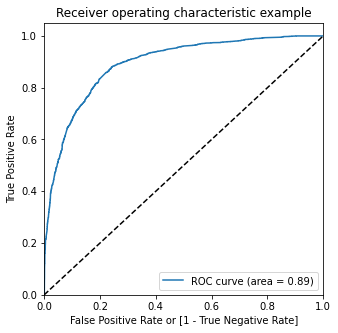

In [112]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under ROC curve is 0.89 which is a very good value.

In [113]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.384024,0,1,1,1,1,0,0,0,0,0,0
1,0,0.248399,0,1,1,1,0,0,0,0,0,0,0
2,0,0.403108,0,1,1,1,1,1,0,0,0,0,0
3,0,0.854625,1,1,1,1,1,1,1,1,1,1,0
4,0,0.203360,0,1,1,1,0,0,0,0,0,0,0


In [114]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.635745,0.970803,0.429285
0.2,0.2,0.757730,0.922547,0.656172
0.3,0.3,0.806277,0.870235,0.766867
0.4,0.4,0.813544,0.770073,0.840330
0.5,0.5,0.817409,0.703974,0.887306
0.6,0.6,0.805968,0.611111,0.926037
0.7,0.7,0.787879,0.532847,0.945027
0.8,0.8,0.764842,0.436740,0.967016
0.9,0.9,0.718306,0.281022,0.987756


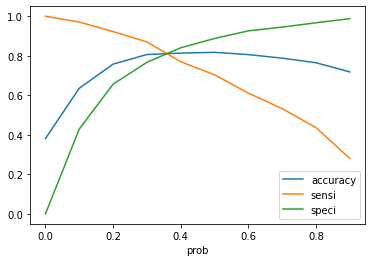

In [115]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph it is visible that the optimal cut off is at 0.35

In [116]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.384024,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.248399,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.403108,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.854625,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.203360,0,1,1,1,0,0,0,0,0,0,0,0


In [117]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8155534941249227

In [118]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3266,  736],
       [ 457, 2009]], dtype=int64)

In [119]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [120]:
# Calculating the sensitivity
TP/(TP+FN)

0.8146796431467964

In [121]:
# Calculating the specificity
TN/(TN+FP)

0.8160919540229885

#### With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 81% for Train Data

### Step : Precision-Recall (Another metric optional)

In [122]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3551,  451],
       [ 730, 1736]], dtype=int64)

In [123]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7937814357567444

In [124]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7039740470397404

With the current cut off as 0.35 we have Precision around 78% and Recall around 70%

### Precision and recall tradeoff 

In [125]:
from sklearn.metrics import precision_recall_curve

In [126]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [127]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

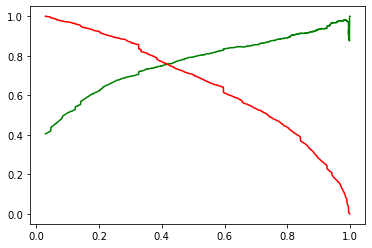

In [128]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [129]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.384024,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.248399,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.403108,0,1,1,1,1,1,0,0,0,0,0,0
3,0,0.854625,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.203360,0,1,1,1,0,0,0,0,0,0,0,0


In [130]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8155534941249227

In [131]:
# Creating confusion matrix again
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion3

array([[3392,  610],
       [ 583, 1883]], dtype=int64)

In [132]:
# Substituting the value of true positive
TP = confusion3[1,1]
# Substituting the value of true negatives
TN = confusion3[0,0]
# Substituting the value of false positives
FP = confusion3[0,1] 
# Substituting the value of false negatives
FN = confusion3[1,0]

In [133]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7553148816686723

In [134]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7635847526358476

#### Hence there is a decline so better the optimum cut off is 0.35 obtained from ROC we use cut off 0.35 for further analysis

## Step 12: Prediction on Test set

In [135]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [136]:
# Substituting all the columns in the final train model
col = X_train.columns

In [137]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Opened,Last Activity_Other,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_not provided,What is your current occupation_Working Professional,What matters most to you in choosing a course_not provided,Last Notable Activity_Modified,Last Notable Activity_Other
4269,1.0,0.031873,0.444982,0,0,0,0,0,0,1,0,1,0,1,0,0
2376,1.0,0.000000,0.000000,1,0,0,0,0,0,1,0,1,0,0,0,0
7766,1.0,0.019920,0.025968,0,0,0,0,0,0,0,0,0,1,0,0,1
9199,1.0,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0,1,0
4359,1.0,0.000000,0.000000,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.0,0.059761,0.127641,0,0,0,0,0,0,0,0,0,0,1,0,0
2152,1.0,0.000000,0.000000,1,0,0,0,0,0,1,0,1,0,0,0,0
7101,1.0,0.000000,0.000000,0,1,0,0,1,0,0,0,1,0,0,0,0
5331,1.0,0.011952,0.707746,0,0,0,1,0,0,0,0,0,0,1,1,0


In [138]:
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.517781
1,1,0.926428
2,1,0.882625
3,0,0.123718
4,1,0.841729


In [139]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.517781,1
1,1,0.926428,1
2,1,0.882625,1
3,0,0.123718,0
4,1,0.841729,1
...,...,...,...
2767,0,0.065956,0
2768,1,0.926428,1
2769,0,0.325879,0
2770,0,0.101492,0


In [140]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)


0.8131313131313131

In [141]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1372,  305],
       [ 213,  882]], dtype=int64)

In [142]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [143]:
# Calculating the sensitivity
TP/(TP+FN)

0.8054794520547945

In [144]:
# Calculating the specificity
TN/(TN+FP)

0.8181276088252832

#### With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80-81% for Test Data

## Hence The Sensitivity is 80% + which signifies that it is a decent model

In [145]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2598.2
Date:                Mon, 07 Sep 2020   Deviance:                       5196.4
Time:                        17:57:45   Pearson chi2:                 7.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.5154      0.128    -19.640      0.000      -2.766      -2.264
TotalVisits                                                    6.1617      1.951      3.158      0.002       2.338       9.985
Total Time Spent on Website                                    4.5357      0.168     27.046      0.000       4.207       4.864
Lead Origin_Lead Add Form                                      3.5943      0.193     18.595      0.000       3.215       3.973
Lead Source_Olark Chat                                         1.4507      0.119     12.221      0.000       1.218       1.683
Lead Source_Welingak Website                                   2.0432      0.746      2.738      0.006       0.580       3.506
Do Not Email_Yes                                              -1.2283      0.179     -6.866      0.000      -1.579      -0.878
Last Activity_Email Opened                                     0.5923      0.106      5.579      0.000       0.384       0.800
Last Activity_Other                                            1.7349      0.516      3.365      0.001       0.724       2.745
Last Activity_SMS Sent                                         1.7086      0.108     15.874      0.000       1.498       1.920
Specialization_Hospitality Management                         -0.9460      0.328     -2.885      0.004      -1.589      -0.303
Specialization_not provided                                   -0.2544      0.088     -2.877      0.004      -0.428      -0.081
What is your current occupation_Working Professional           2.5095      0.191     13.140      0.000       2.135       2.884
What matters most to you in choosing a course_not provided    -1.0823      0.088    -12.340      0.000      -1.254      -0.910
Last Notable Activity_Modified                                -0.6385      0.088     -7.250      0.000      -0.811      -0.466
Last Notable Activity_Other                                    1.7829      0.352      5.062      0.000       1.093       2.473
==============================================================================================================================
"""

In [146]:
res.params

const                                                        -2.515447
TotalVisits                                                   6.161664
Total Time Spent on Website                                   4.535677
Lead Origin_Lead Add Form                                     3.594343
Lead Source_Olark Chat                                        1.450694
Lead Source_Welingak Website                                  2.043165
Do Not Email_Yes                                             -1.228268
Last Activity_Email Opened                                    0.592252
Last Activity_Other                                           1.734917
Last Activity_SMS Sent                                        1.708556
Specialization_Hospitality Management                        -0.945975
Specialization_not provided                                  -0.254383
What is your current occupation_Working Professional          2.509506
What matters most to you in choosing a course_not provided   -1.082257
Last N

## Conclusion

It was found that the variables that mattered the most in the potential buyers are (In descending order) :

- 1. Total number of visits.
- 2. The total time spend on the Website.
- 3. Lead Origin through Add Form
- 4. When the lead source was: <br>
       a. Welingak Website <br>
       b. Olark Chat 
- 5. When their current occupation is as a working professional.
- 6. Last Activity of the user.

## Recommendations

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses by following some different methods and approaches:

- Automated emails and SMS
- Campaigns on Social Networking sites
- Some Additional add-on prep courses

### ************************************************* THE END *************************************************